In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import lsp 
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# HIV Genotype Lattice Signals

The signals s1 and s2 are taken from [1, Appendix Table 4 and Table 7]. s1 maps HIV RT genotypes to their RT inhibitor zidovudine resistance, and, s2 maps HIV PR genotypes to their PR inhibitor indinavir resistance.

[1] Beerenwinkel, N., Knupfer, P. and Tresch, A.; Learning Monotonic Genotype-Phenotype Maps; https://www.research-collection.ethz.ch/handle/20.500.11850/30573

In [3]:
s1 = {}
s1[(0,0,0,0,0,0,0)] = -0.06
s1[(0,1,0,0,0,0,0)] = 0.13
s1[(0,1,1,0,0,0,0)] = 0.13
s1[(1,0,0,0,0,0,0)] = 0.15
s1[(1,0,0,0,0,1,0)] = 0.80
s1[(0,1,0,1,0,0,0)] = 1
s1[(0,1,0,1,0,0,1)] = 1
s1[(0,1,1,1,0,0,0)] = 1
s1[(1,0,0,0,1,1,0)] = 1.23
s1[(1,1,0,0,0,0,0)] = 1.3
s1[(1,1,0,0,0,1,0)] = 1.3
s1[(1,1,1,0,0,0,0)] = 1.3
s1[(1,1,1,0,0,1,0)] = 1.3
s1[(1,1,0,0,1,1,0)] = 1.67
s1[(1,1,0,1,0,0,0)] = 1.67
s1[(1,1,0,1,0,1,0)] = 1.67
s1[(1,1,0,1,1,1,0)] = 1.67
s1[(0,1,1,1,0,0,1)] = 1.83
s1[(1,1,0,1,0,0,1)] = 2.06
s1[(1,1,0,1,0,1,1)] = 2.06
s1[(1,1,0,1,1,1,1)] = 2.06
s1[(1,1,1,0,1,1,0)] = 2.24
s1[(1,1,1,1,0,0,0)] = 2.24
s1[(1,1,1,1,0,0,1)] = 2.24
s1[(1,1,1,1,0,1,0)] = 2.24
s1[(1,1,1,1,0,1,1)] = 2.24
s1[(1,1,1,1,1,1,0)] = 2.24
s1[(1,1,1,1,1,1,1)] = 2.24

In [4]:
s2 = {}
s2[(0,0,0,0,0,0)] = -0.05
s2[(0,0,0,0,0,1)] = 0.59
s2[(0,0,1,0,0,0)] = 1.07
s2[(0,0,1,1,0,0)] = 1.07 
s2[(1,0,0,0,0,0)] = 1.08
s2[(1,0,1,0,0,0)] = 1.16
s2[(1,0,1,1,0,0)] = 1.16
s2[(1,0,0,0,0,1)] = 1.20 
s2[(0,0,0,0,1,1)] = 1.23
s2[(1,0,0,0,1,1)] = 1.35
s2[(0,0,1,0,0,1)] = 1.40
s2[(0,0,1,0,1,1)] = 1.40
s2[(0,0,1,1,0,1)] = 1.40
s2[(0,0,1,1,1,1)] = 1.40
s2[(1,0,1,0,0,1)] = 1.53
s2[(1,0,1,0,1,1)] = 1.53
s2[(1,0,1,1,0,1)] = 1.53
s2[(1,0,1,1,1,1)] = 1.53
s2[(0,1,0,0,0,0)] = 1.99 
s2[(0,1,0,0,0,1)] = 1.99
s2[(0,1,0,0,1,1)] = 1.99
s2[(0,1,1,0,0,0)] = 1.99
s2[(0,1,1,0,0,1)] = 1.99
s2[(0,1,1,0,1,1)] = 1.99
s2[(0,1,1,1,0,0)] = 1.99
s2[(0,1,1,1,0,1)] = 1.99
s2[(0,1,1,1,1,1)] = 1.99
s2[(1,1,0,0,0,0)] = 2.38
s2[(1,1,0,0,0,1)] = 2.38
s2[(1,1,0,0,1,1)] = 2.38
s2[(1,1,1,0,0,0)] = 2.38
s2[(1,1,1,1,0,0)] = 2.38
s2[(1,1,1,0,0,1)] = 2.61
s2[(1,1,1,0,1,1)] = 2.61
s2[(1,1,1,1,0,1)] = 2.61
s2[(1,1,1,1,1,1)] = 2.61

In [5]:
def meet(a, b):
    c = np.asarray(a)*np.asarray(b)
    c = c.astype(np.int32)
    c = tuple(c.tolist())
    return c

In [7]:
sp1 = lsp.LSP(list(s1.keys()), meet)
sp2 = lsp.LSP(list(s2.keys()), meet)

closing under meet...
computing partial order...
inverting partial order matrix...
closing under meet...
computing partial order...
inverting partial order matrix...


In [9]:
rt = np.asarray([s1[tuple(l)] for l in sp1.lattice])
pr = np.asarray([s2[tuple(l)] for l in sp2.lattice])

<BarContainer object of 28 artists>

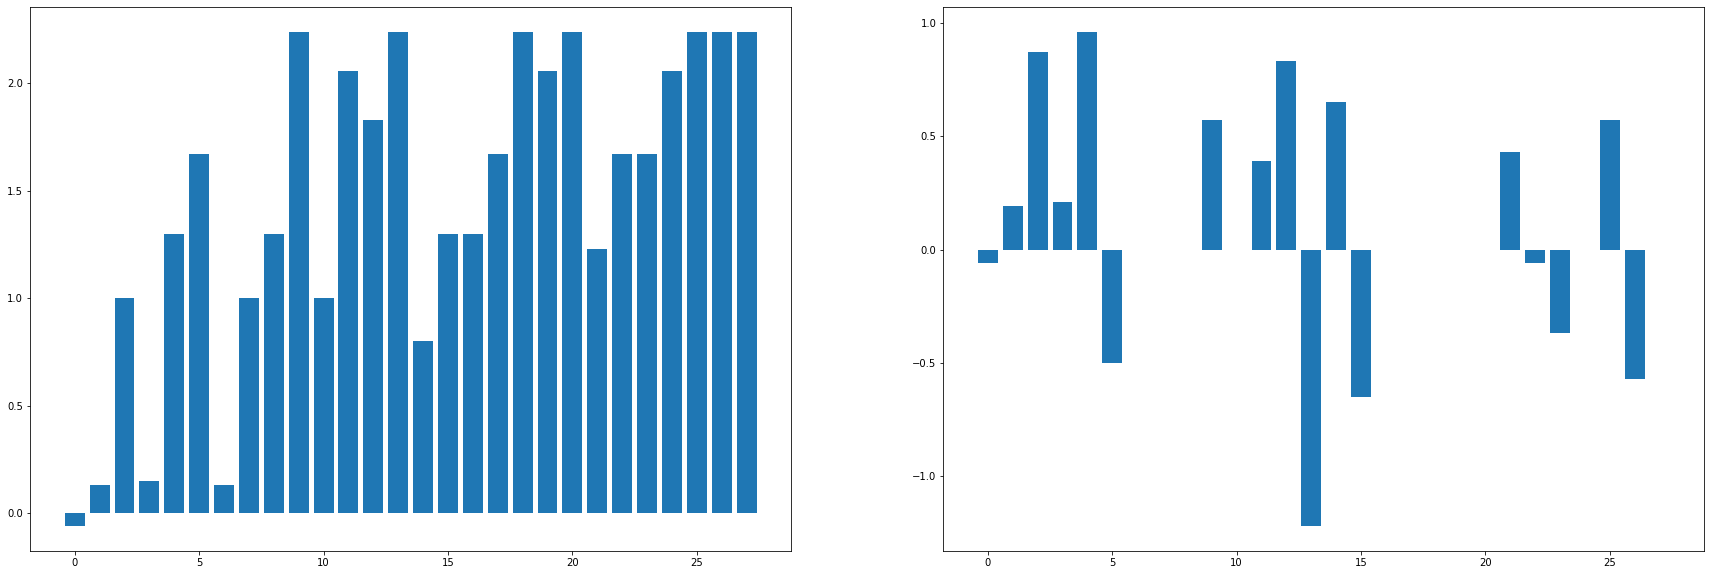

In [14]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1).bar(np.arange(len(rt)), rt)
plt.subplot(1, 2, 2).bar(np.arange(len(rt)), sp1.ft(rt))

In [16]:
print(np.sum(np.abs(sp1.ft(rt)) <= 1e-8), "out of", len(sp1.lattice), "Fourier coefficients are zero.")

11 out of 28 Fourier coefficients are zero.


<BarContainer object of 36 artists>

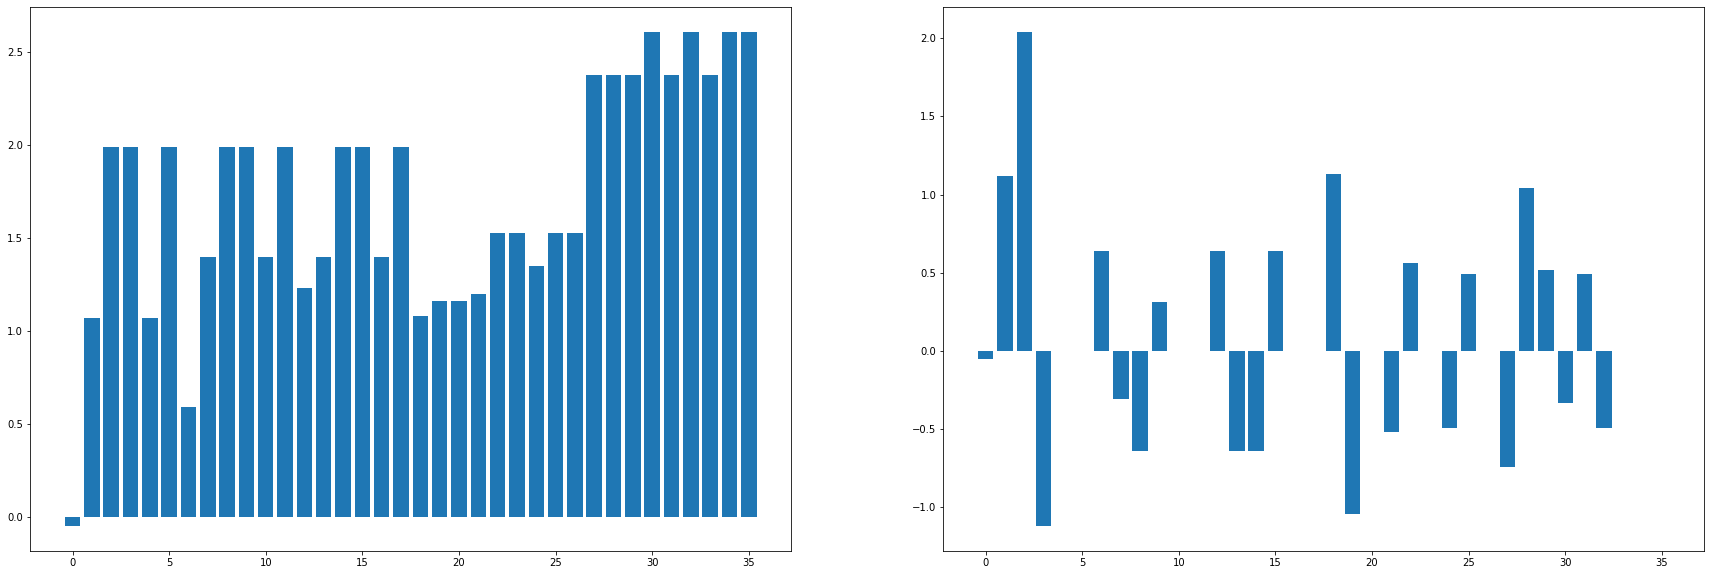

In [17]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1).bar(np.arange(len(pr)), pr)
plt.subplot(1, 2, 2).bar(np.arange(len(pr)), sp2.ft(pr))

In [18]:
print(np.sum(np.abs(sp2.ft(pr)) < 1e-8), "out of", len(sp2.lattice), "Fourier coefficients are zero.")

12 out of 36 Fourier coefficients are zero.
